# Query

select * from `ftds-hacktiv8-project.phase1_ftds_015_rmt.heart-failure`

# Perkenalan

Nama      : Immanuel Yosia Alfrenco

Batch     : FTDS-015

Dataset   : Heart-Failure Dataset

Objective : Membuat model Classification menggunakan Random Forest dan salah satu algoritma boosting untuk memprediksi apakah seorang pasien akan meninggal atau tidak menggunakan dataset yang sudah Anda dapatkan.


# Import Libraries

In [1]:
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 17.0 MB/s 


In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# Untuk membuat model
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Untuk menyiapkan dataset
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# Untuk evaluasi model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Data Loading

In [3]:
# Import data CSV
data_ori = pd.read_csv('h8dsft_P1G3_immanuel_yosia_alfrenco.csv')

In [4]:
# Melakukan duplikasi data untuk backup
data = data_ori.copy()

Setelah data berhasil diimport saya akan mengecek head, tail dan informasi dasar dari data kita.

In [5]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


In [6]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Kita bisa lihat ternyata data kita terdiri dari 13 kolom dan semuanya bertipe numeric.

# Exploratory Data Analysis (EDA)

## Numerical Data Summary

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


## Age

In [9]:
death = data[data['DEATH_EVENT']==1]
no_death = data[data['DEATH_EVENT']==0]

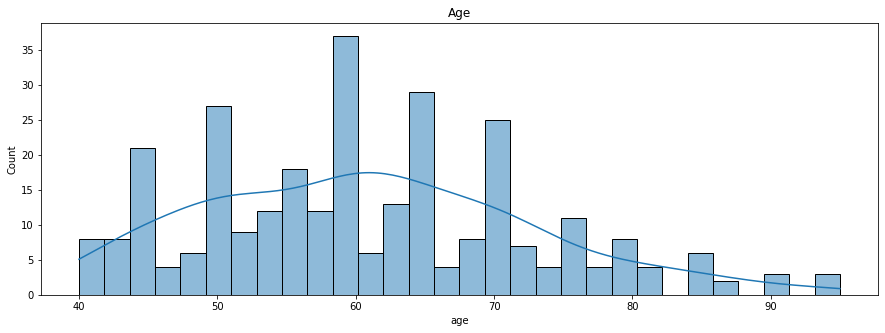

Age Skewness value :  0.4230619067286355
Min Age : 40.0
Max Age : 95.0
Mean Age : 60.83389297658862


In [10]:
plt.figure(figsize = (15, 5))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age')
plt.show()
print('Age Skewness value : ', data['age'].skew())
print(f'Min Age : {data.age.min()}')
print(f'Max Age : {data.age.max()}')
print(f'Mean Age : {data.age.mean()}')

Kita bisa lihat bahwa rata-rata umur pasien gagal jantung berada di umur 60 tahun dengan umur terendah 40 tahun dan yang tertua adalah 95 tahun, hal ini menunjukan bahwa sakit gagal jantung ini hanya menyerang orang tua di atas 40 tahun.

## Bloods

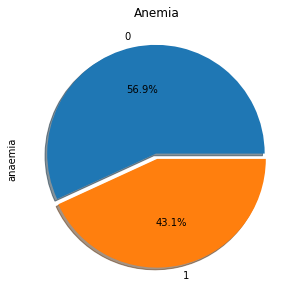

In [11]:
plt.figure(figsize=(5,5))
data['anaemia'].value_counts().plot(kind='pie', explode=[0.05, 0], autopct='%1.1f%%', shadow=True)
plt.title('Anemia')
plt.show()

Ternyata sebanyak 43.1% pasien gagal jantung pada data kita memiliki penyakit anemia atau kekurangan sel darah merah.

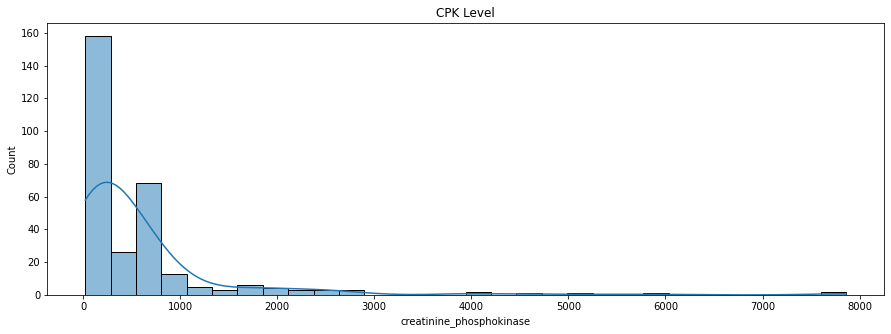

CPK level Skewness value :  4.463110084653752
Min CPK level : 23
Max CPK level : 7861
Mean CPK level : 581.8394648829432


In [12]:
plt.figure(figsize = (15, 5))
sns.histplot(data['creatinine_phosphokinase'], bins=30, kde=True)
plt.title('CPK Level')
plt.show()
print('CPK level Skewness value : ', data['creatinine_phosphokinase'].skew())
print(f'Min CPK level : {data.creatinine_phosphokinase.min()}')
print(f'Max CPK level : {data.creatinine_phosphokinase.max()}')
print(f'Mean CPK level : {data.creatinine_phosphokinase.mean()}')

Pasien gagal jantung pada data kita memiliki range level CPK enzyme dalam darah yang luas, dari 23 mcg/L hingga 7861 mcg/L.

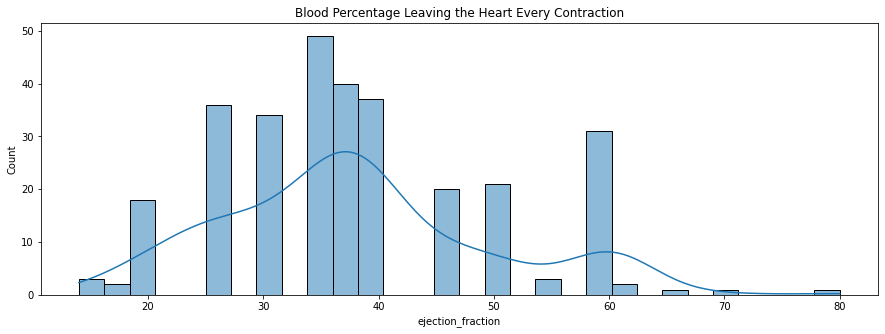

Blood Percentage Skewness value :  0.5553827516973213
Min Percentage : 14
Max Percentage : 80
Mean Percentage : 38.08361204013378


In [13]:
plt.figure(figsize = (15, 5))
sns.histplot(data['ejection_fraction'], bins=30, kde=True)
plt.title('Blood Percentage Leaving the Heart Every Contraction')
plt.show()
print('Blood Percentage Skewness value : ', data['ejection_fraction'].skew())
print(f'Min Percentage : {data.ejection_fraction.min()}')
print(f'Max Percentage : {data.ejection_fraction.max()}')
print(f'Mean Percentage : {data.ejection_fraction.mean()}')

Dari informasi di internet, ejection fraction normalnya berada di angka 55-70%, namun data kita menunjukan angka dengan range dari 14% hingga 80% artinya pasien gagal jantung kita memang ada yang ejection fractionya sangat kecil dan ada juga yang ejection fractionya normal.

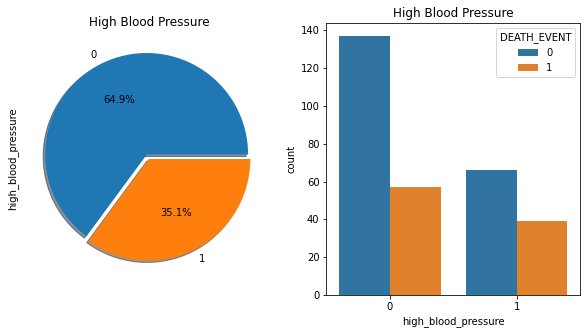

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
data['high_blood_pressure'].value_counts().plot(kind='pie', explode=[0.05, 0], autopct='%1.1f%%', shadow=True)
plt.title('High Blood Pressure')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x="high_blood_pressure", hue="DEATH_EVENT")
plt.title('High Blood Pressure')

plt.show()

Visual di atas menunjukan bahwa 34.9% pasien gagal jantung kita memiliki hipertensi dan 65.1% sisanya tidak. Jika kita lihat perbandingan hipertensi pada pasien yang selamat ternyata kebanyakan tidak memiliki hipertensi.

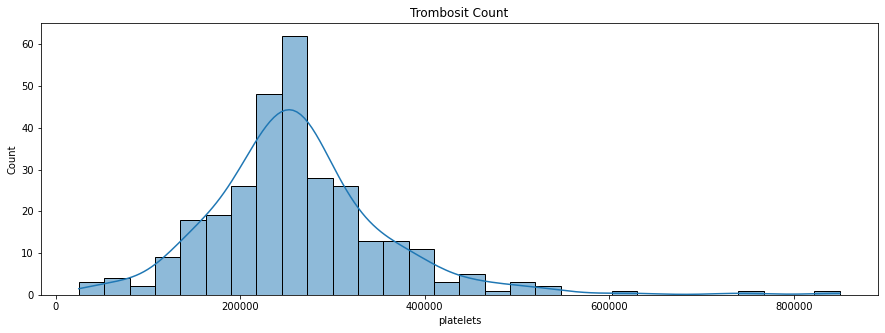

Platelets Skewness value :  1.462320838275779
Min Platelets : 25100.0
Max Platelets : 850000.0
Mean Platelets : 263358.02926421404


In [15]:
plt.figure(figsize = (15, 5))
sns.histplot(data['platelets'], bins=30, kde=True)
plt.title('Trombosit Count')
plt.show()
print('Platelets Skewness value : ', data['platelets'].skew())
print(f'Min Platelets : {data.platelets.min()}')
print(f'Max Platelets : {data.platelets.max()}')
print(f'Mean Platelets : {data.platelets.mean()}')

Visual di atas menunjukan jumlah trombosit dalam darah pasien kita. Jumlah trombosit normal berada di angka 150 ribu sampai 450 ribu, namun bisa dilihat pasien dalam data kita ada yang trombositnya sangat rendah yaitu 25 ribu dan ada yang tinggi sekali mencapai 850 ribu. Rata-rata trombosit pada pasien kita berada di angka 263 ribu dimana masih dalam batas normal.

## Diabetes

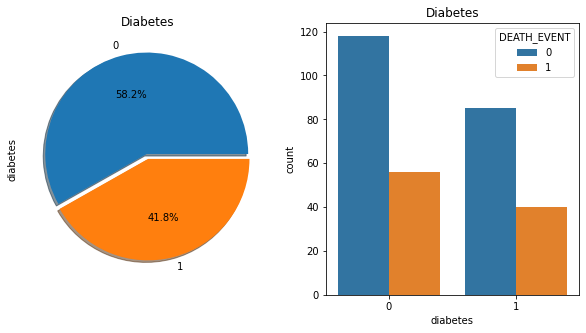

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
data['diabetes'].value_counts().plot(kind='pie', explode=[0.05, 0], autopct='%1.1f%%', shadow=True)
plt.title('Diabetes')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x="diabetes", hue="DEATH_EVENT")
plt.title('Diabetes')
plt.show()

Kita bisa lihat bahwa 42.2% pasien kita memiliki diabetes dan 57.8 sisanya tidak memiliki diabetes. 

## Gender

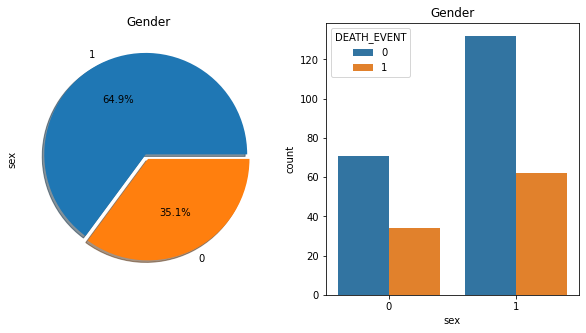

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
data['sex'].value_counts().plot(kind='pie', explode=[0.05, 0], autopct='%1.1f%%', shadow=True)
plt.title('Gender')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x="sex", hue="DEATH_EVENT")
plt.title('Gender')
plt.show()

Kita bisa lihat ternyata mayoritas pasien gagal jantung ternyata adalah laki-laki dengan jumlah 64.7 persen dimana wanita hanya 35.3%. Kita juga bisa melihat ternyata tingkat kematian lebih tinggi pada laki laki mungkin karena jumlahnya yang lebih banyak juga.

## Smoking

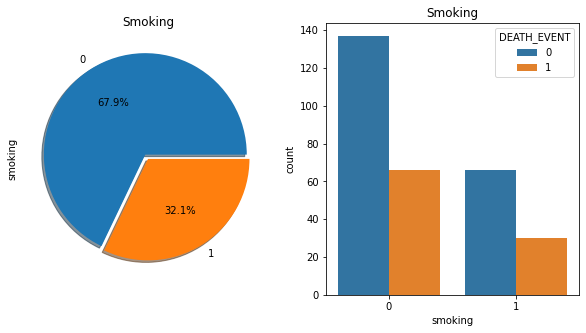

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
data['smoking'].value_counts().plot(kind='pie', explode=[0.05, 0], autopct='%1.1f%%', shadow=True)
plt.title('Smoking')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x="smoking", hue="DEATH_EVENT")
plt.title('Smoking')
plt.show()

Ternyata hanya sedikit dari pasien kita yang merupakan perokok yaitu hanya 31.1% yang merokok dan 68.9% sisanya bukan perokok. 

## Follow Up Periode

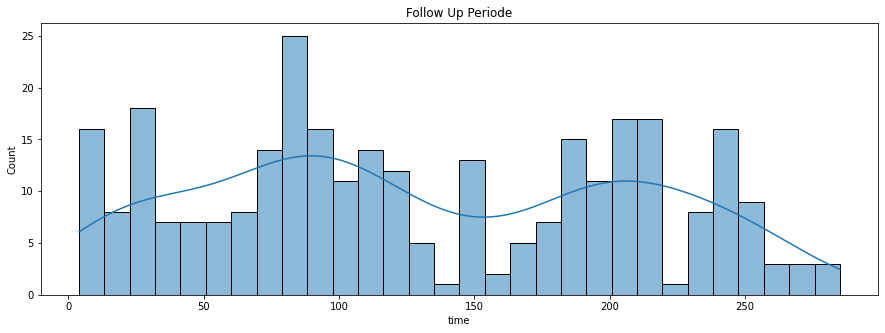

Periode Skewness value :  0.12780264559841178
Min Time Periode : 4
Max Time Periode : 285
Mean Time Periode : 130.2608695652174


In [19]:
plt.figure(figsize = (15, 5))
sns.histplot(data['time'], bins=30, kde=True)
plt.title('Follow Up Periode')
plt.show()
print('Periode Skewness value : ', data['time'].skew())
print(f'Min Time Periode : {data.time.min()}')
print(f'Max Time Periode : {data.time.max()}')
print(f'Mean Time Periode : {data.time.mean()}')

Kita bisa melihat periode waktu pengamatan pasien, yang paling cepat adalah 4 hari dan yang terlama adalah 285 hari dengan rata-rata periode follow-up selama 129 hari.

## Death Event (Target)

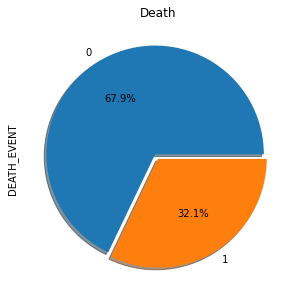

In [20]:
plt.figure(figsize=(5,5))
data['DEATH_EVENT'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0], shadow=True)
plt.title('Death')
plt.show()

In [21]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Dari 299 pasien gagal jantung yang akhirnya meninggal ada 96 orang atau 32.1% sedangkan yang selamat ada 203 orang atau 67.9%.

## Correlation Between Column

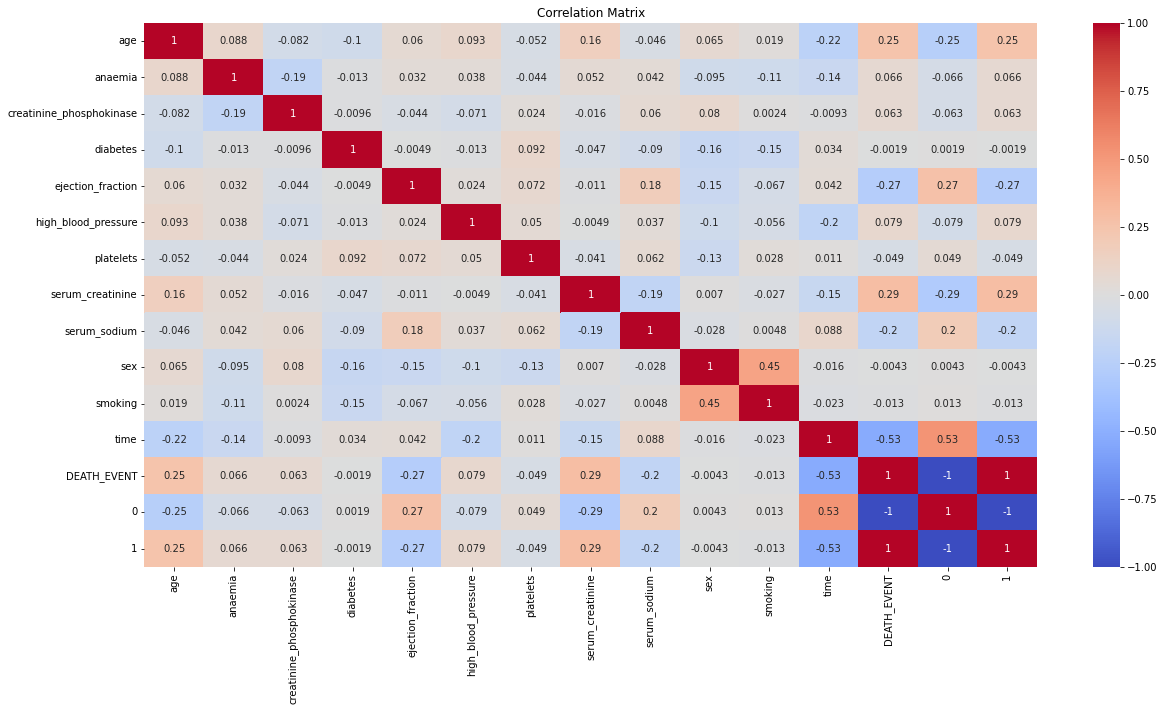

In [22]:
corr1 = pd.concat([data, pd.get_dummies(data['DEATH_EVENT'])], axis=1).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing

## Get data for model inference

In [23]:
# Membuat data inference

data_inf = data.sample(10, random_state=17)
data_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
121,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
94,65.0,1,113,1,60,1,203000.00,0.90,140,0,0,94,0
138,50.0,0,250,0,25,0,262000.00,1.00,136,1,1,120,0
288,63.0,0,193,0,60,1,295000.00,1.30,145,1,1,107,0
139,59.0,1,176,1,25,0,221000.00,1.00,136,1,1,150,1
13,72.0,0,211,0,25,0,274000.00,1.20,134,0,0,207,0
230,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
165,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212,0
58,50.0,0,318,0,40,1,216000.00,2.30,131,0,0,60,1
122,55.0,0,1199,0,20,0,263358.03,1.83,134,1,1,241,1


In [24]:
# Menghapus inference set dari dataset awal

data = data.drop(data_inf.index)
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


In [25]:
# Reset index pada data Inference dan data awal agar tidak terjadi error

data_inf.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

data_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
1,65.0,1,113,1,60,1,203000.00,0.90,140,0,0,94,0
2,50.0,0,250,0,25,0,262000.00,1.00,136,1,1,120,0
3,63.0,0,193,0,60,1,295000.00,1.30,145,1,1,107,0
4,59.0,1,176,1,25,0,221000.00,1.00,136,1,1,150,1
5,72.0,0,211,0,25,0,274000.00,1.20,134,0,0,207,0
6,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
7,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212,0
8,50.0,0,318,0,40,1,216000.00,2.30,131,0,0,60,1
9,55.0,0,1199,0,20,0,263358.03,1.83,134,1,1,241,1


## Splitting Between Train-Set and Test-Set

Kita akan memisahkan data menjadi Train-Set dan juga Test-Set

In [26]:
# Memisahkan `X` (Features) and `y` (Targets)

X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17, stratify=data.DEATH_EVENT)

print("Train Size : ", X_train.shape)
print("Test Size : ", X_test.shape)

Train Size :  (231, 12)
Test Size :  (58, 12)


## Handling Missing Values

Kita akan melakukan check Missing Values pada Train Set dan Test Set

### Train_set

In [28]:
# Mengecek jumlah missing value tiap kolom pada Train-Set

X_train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [29]:
y_train.isnull().sum()

0

Kita bisa melihat bahwa tidak ada missing values pada Train Set, selanjutnya kita akan mengecek Test-Set.

### Test-Set

In [30]:
# Mengecek jumlah missing value tiap kolom pada Test-Set

X_test.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [31]:
y_test.isnull().sum()

0

Kita bisa melihat bahwa pada Test-Set juga tidak ada missing values, maka kita bisa melanjutkan ke tahap selanjutnya.

## Handling Outliers

### Check Distribution

Sebelum menentukan metode handling outliers, kita harus mengetahui tipe distribusi dari data kita.

In [32]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

    print(variable, 'skewness value : ', df[variable].skew())

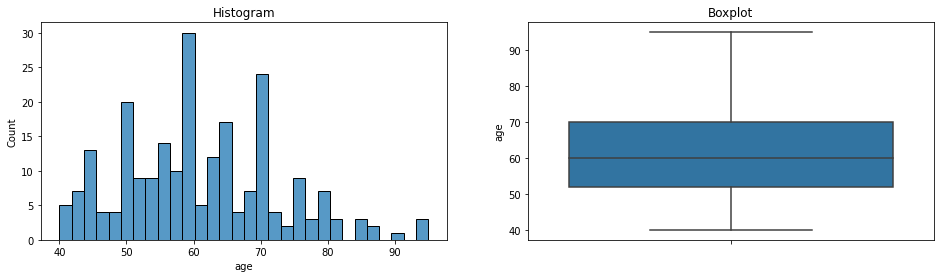

age skewness value :  0.42534795079072013


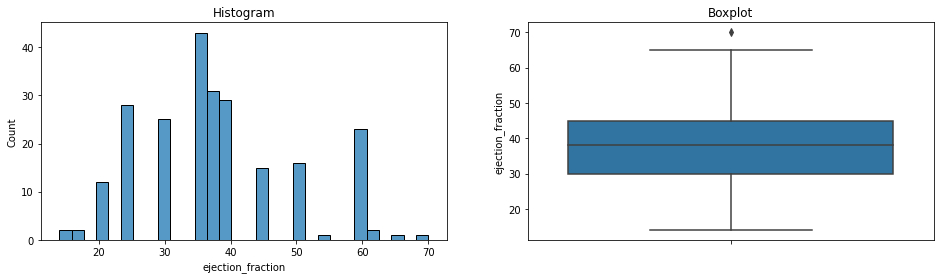

ejection_fraction skewness value :  0.5222475457552266


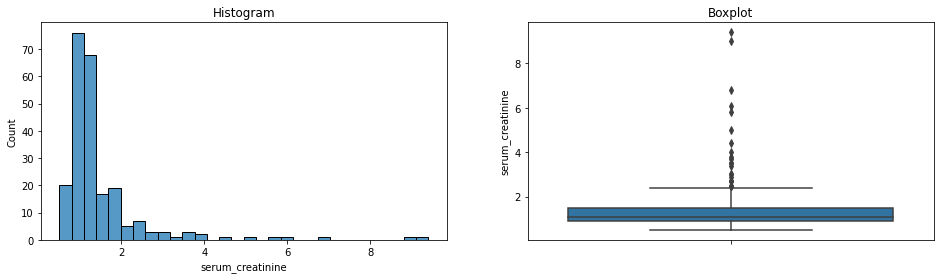

serum_creatinine skewness value :  4.10734421613186


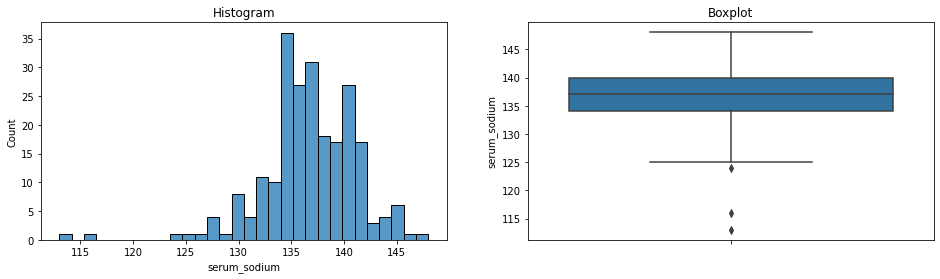

serum_sodium skewness value :  -1.098486191740534


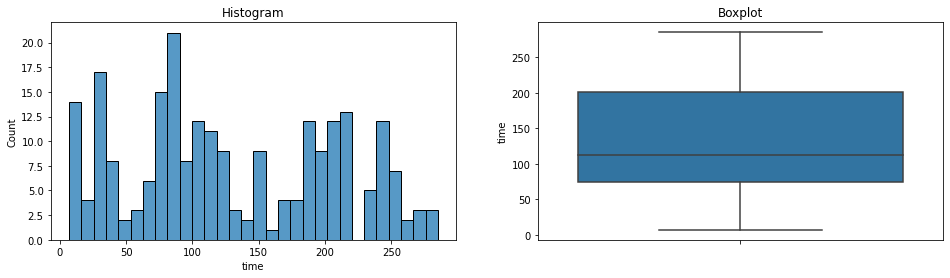

time skewness value :  0.18311472521822383


In [33]:
diagnostic_plots(X_train, 'age')
diagnostic_plots(X_train, 'ejection_fraction')
diagnostic_plots(X_train, 'serum_creatinine')
diagnostic_plots(X_train, 'serum_sodium')
diagnostic_plots(X_train, 'time')

Menurut personal jugdement saya, sebaiknya outliers pada data ini tidak perlu dihandling karena merupakan data pasien, terlebih lagi banyak data penting seperti dosis dimana setiap pasien akan berbeda-beda sehingga perbedaan tersebut adalah natural dan bukan outliers.

## Feature Selection

Kita akan memilih feature yang akan digunakan dengan sesuai perhitungan korelasi antar kolom dan juga personal judgement yang berdasarkan informasi di internet.

Sumber : 
https://www.halodoc.com/artikel/waspada-diabetes-bisa-sebabkan-komplikasi-penyakit-jantung-dan-hipertensi

In [34]:
X_train = X_train[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time', 'diabetes', 'high_blood_pressure']]
X_test = X_test[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time', 'diabetes', 'high_blood_pressure']]


In [35]:
X_train

,age,ejection_fraction,serum_creatinine,serum_sodium,time,diabetes,high_blood_pressure
249,60.000,45,6.10,131,107,1,0
39,70.000,35,1.10,142,245,0,0
98,60.000,62,6.80,146,43,1,0
155,60.667,30,1.50,136,171,1,0
260,90.000,50,1.00,134,30,1,0
...,...,...,...,...,...,...,...
32,50.000,35,0.90,142,126,1,0
230,63.000,40,0.90,137,123,0,0
275,58.000,60,1.00,141,83,0,1
46,60.000,38,0.75,140,95,1,0


## Split between Numerical Columns and Categorical Columns

In [36]:
# Mendapatkan list Numerical columns sesuai tiper persebarannya dan Categorical columns

num_cols_norm = ['age', 'time']
num_cols_skew = ['ejection_fraction', 'serum_creatinine', 'serum_sodium']
cat_cols = ['diabetes', 'high_blood_pressure']

print('Normal Numerical Columns : ', num_cols_norm)
print('Skewed Numerical Columns : ', num_cols_skew)
print('Categorical Columns : ', cat_cols)

Normal Numerical Columns :  ['age', 'time']
Skewed Numerical Columns :  ['ejection_fraction', 'serum_creatinine', 'serum_sodium']
Categorical Columns :  ['diabetes', 'high_blood_pressure']


## Features Engineering

Kita akan melakukan scaling dan encoding menggunakan pipeline

Karena semua data kita di atas ada yang bertipe normal dan skewed, maka akan dilakukan:
* Scaling menggunakan MinMaxScaler untuk skew.
* Scaling menggunakan StandardScaler untuk normal.

Untuk kolom categorical tidak perlu lagi dilakukan encoding karena sudah dalam bentuk encoded, jadi kita akan melakukan *passthrough* pada pipeline.

In [37]:
# Numeric Features Scaling
num_skew = Pipeline([('scaling', MinMaxScaler())])
num_norm = Pipeline([('scaling', StandardScaler())])

# Preprocessing Pipeline
preprocess = ColumnTransformer([
    ('norm_scale', num_norm, num_cols_norm),
    ('skew_scale', num_skew, num_cols_skew),
    ('cat', 'passthrough', cat_cols)
])

# Model Definition

Karena kasus kali ini adalah kasus klasifikasi maka kita akan menggunakan model yang khusus untuk klasifikasi dimana kita memilih Random Forest dan Extreme Gradient Boosting.

Kita akan membuat pipeline untuk tiap model untuk mempersingkat proses.

In [38]:
# Random Forest Pipeline
rfc_pipe = Pipeline([('preprocessing', preprocess), ('rfc', RandomForestClassifier())])

# Extreme Gradient Boosting Pipeline
xgb_pipe = Pipeline([('preprocessing', preprocess), ('xgb', XGBClassifier())])

In [39]:
# Hyperparameter Random Forest dan XGB untuk gridsearch
param_rfc = {'rfc__bootstrap': [True],
             'rfc__max_depth': [80, 90, 100],
             'rfc__max_features': [2, 3],
             'rfc__min_samples_leaf': [3, 4, 5],
             'rfc__min_samples_split': [8, 10, 12],
             'rfc__n_estimators': [100, 200, 300]}

param_xgb = {'xgb__max_depth': [1, 5, 10],
             'xgb__gamma': [1, 3, 5, 7],
             'xgb__eta' : [0.1, 0.2],
             'xgb__min_child_weight' : [1, 5, 10],
             'xgb__n_estimators': [100, 200]}

# Model Training

## Random Forest

In [40]:
grid_rfc = GridSearchCV(rfc_pipe, param_grid=param_rfc, cv=5, n_jobs=-1, return_train_score=True)

In [41]:
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('norm_scale',
                                                                         Pipeline(steps=[('scaling',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'time']),
                                                                        ('skew_scale',
                                                                         Pipeline(steps=[('scaling',
                                                                                          MinMaxScaler())]),
                                                                         ['ejection_fraction',
                                                                    

In [42]:
grid_rfc.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('norm_scale',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['age', 'time']),
                                                 ('skew_scale',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['ejection_fraction',
                                                   'serum_creatinine',
                                                   'serum_sodium']),
                                                 ('cat', 'passthrough',
                                                  ['diabetes',
                                                   'high_blood_pressure'])])),
              

## Extreme Gradient Boosting

In [43]:
grid_xgb = GridSearchCV(xgb_pipe, param_grid=param_xgb, cv=5, n_jobs=-1, return_train_score=True)

In [44]:
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('norm_scale',
                                                                         Pipeline(steps=[('scaling',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'time']),
                                                                        ('skew_scale',
                                                                         Pipeline(steps=[('scaling',
                                                                                          MinMaxScaler())]),
                                                                         ['ejection_fraction',
                                                                    

In [45]:
grid_xgb.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('norm_scale',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['age', 'time']),
                                                 ('skew_scale',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['ejection_fraction',
                                                   'serum_creatinine',
                                                   'serum_sodium']),
                                                 ('cat', 'passthrough',
                                                  ['diabetes',
                                                   'high_blood_pressure'])])),
              

# Model Evaluation

## Random Forest

In [46]:
print('----Training Set----')
print(classification_report(y_train, grid_rfc.best_estimator_.predict(X_train)))
print('----Testing Set----')
print(classification_report(y_test, grid_rfc.best_estimator_.predict(X_test)))

----Training Set----
              precision    recall  f1-score   support

           0       0.92      0.96      0.93       158
           1       0.89      0.81      0.85        73

    accuracy                           0.91       231
   macro avg       0.90      0.88      0.89       231
weighted avg       0.91      0.91      0.91       231

----Testing Set----
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.71      0.67      0.69        18

    accuracy                           0.81        58
   macro avg       0.78      0.77      0.77        58
weighted avg       0.81      0.81      0.81        58



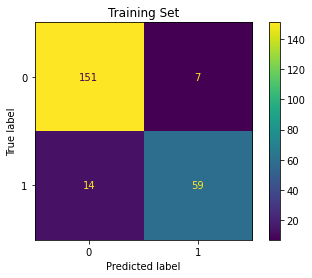

In [47]:
ConfusionMatrixDisplay.from_predictions(y_train, grid_rfc.best_estimator_.predict(X_train))
plt.title('Training Set')
plt.show()

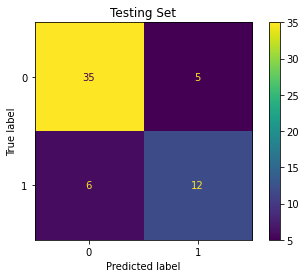

In [48]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_rfc.best_estimator_.predict(X_test))
plt.title('Testing Set')
plt.show()

Kita bisa melihat score hasil dari model Random Forest lumayan bagus namun memiliki score yang overfit. Hasil Train score menunjukan precision yang tinggi untuk label 0 sebesar 0.93 dan label 1 sebesar 0.90, sedangkan untuk recall pada label 0 sebesar 0.96 dan label 1 sebesar 0.84. Hasil pada Test menunjukan score yang lebih rendah dimana untuk precision pada label 0 sebesar 0.85 dan label 1 sebesar 0.71 sedangkan untuk recall label 0 sebesar 0.88 dan label 1 sebesar 0.67.

## Extreme Gradient Boosting

In [49]:
print('----Training Set----')
print(classification_report(y_train, grid_xgb.best_estimator_.predict(X_train)))
print('----Testing Set----')
print(classification_report(y_test, grid_xgb.best_estimator_.predict(X_test)))

----Training Set----
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       158
           1       0.87      0.82      0.85        73

    accuracy                           0.90       231
   macro avg       0.89      0.88      0.89       231
weighted avg       0.90      0.90      0.90       231

----Testing Set----
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.76      0.72      0.74        18

    accuracy                           0.84        58
   macro avg       0.82      0.81      0.82        58
weighted avg       0.84      0.84      0.84        58



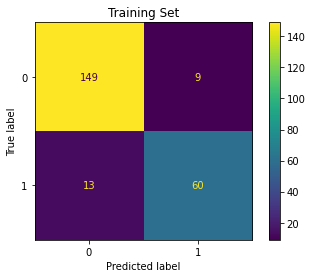

In [50]:
ConfusionMatrixDisplay.from_predictions(y_train, grid_xgb.best_estimator_.predict(X_train))
plt.title('Training Set')
plt.show()

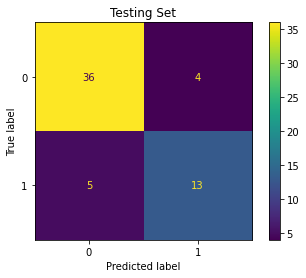

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_xgb.best_estimator_.predict(X_test))
plt.title('Testing Set')
plt.show()

Model XGB menghasilkan score yang overfit juga tapi gapnya lebih kecil dibandingkan dengan model Random Forest. Hasil Train score menunjukan precision yang cukup tinggi untuk label 0 sebesar 0.92 dan label 1 sebesar 0.87, sedangkan untuk recall pada label 0 sebesar 0.94 dan label 1 sebesar 0.82. Hasil pada Test menunjukan score yang lebih sedikit lebih rendah dimana untuk precision pada label 0 sebesar 0.88 dan label 1 sebesar 0.76 sedangkan untuk recall label 0 sebesar 0.90 dan label 1 sebesar 0.72.

## Model Analysis

Dalam kasus ini karena merupakan kasus diagnosa kesehatan kita akan berfokus untuk mengurangi false negatif sehingga kita akan lebih berfokus pada recall label 1 dimana klasifikasi label 1 adalah orang yang meninggal saat sakit gagal jantung. Jika kita salah mendiagnosa orang yang akan meninggal dan diklasifikasikan sehat maka akan bahaya karena kurangnya penanganan nanti.

Kedua model menghasilkan hasil score yang lumayan tinggi namun kedua model kita overfit meskipun model Random Forest lebih overfit dibandingkan dengan model XGB. Dalam Train-Set Random Forest menghasilkan nilai yang lebih tinggi dibandingkan dengan model XGB namun pada Test-Set, model XGB mendapatkan hasil yang lebih tinggi daripada model Random Forest.

Recall label 1 Train Set :
* Model RFC berhasil mengklasifikasi 61 orang meninggal saat gagal jantung dengan benar, namun gagal mengklasifikas 12 orang yang seharusnya akan meninggal namun diprediksi tidak akan meninggal.
* Model XGB berhasil mengklasifikasi 60 orang meninggal saat gagal jantung dengan benar, namun gagal mengklasifikas 13 orang yang seharusnya akan meninggal namun diprediksi tidak akan meninggal.

Recall label 1 Test Set :
* Model RFC berhasil mengklasifikasi 12 orang meninggal saat gagal jantung dengan benar, namun gagal mengklasifikas 6 orang yang seharusnya akan meninggal namun diprediksi tidak akan meninggal.
* Model XGB berhasil mengklasifikasi 13 orang meninggal saat gagal jantung dengan benar, namun gagal mengklasifikas 5 orang yang seharusnya akan meninggal namun diprediksi tidak akan meninggal.

# Model Inference

## Inferencing

Sebelum melakukan evaluasi pada Inference Set, kita akan melakukan tahapan preprocessing yang sama dengan yang dilakukan pada Test-Set. Kita akan menggunakan hasil gridsearch yang didalamnya sudah terdapat pipeline untuk preprocess dan juga model hasil tuning.

In [52]:
# Memilih fitur yang akan digunakan
data_inf_ = data_inf[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time', 'diabetes', 'high_blood_pressure']]
data_inf_

,age,ejection_fraction,serum_creatinine,serum_sodium,time,diabetes,high_blood_pressure
0,73.0,20,1.83,134,198,0,0
1,65.0,60,0.90,140,94,1,1
2,50.0,25,1.00,136,120,0,0
3,63.0,60,1.30,145,107,0,1
4,59.0,25,1.00,136,150,1,0
5,72.0,25,1.20,134,207,0,0
6,90.0,40,2.10,132,8,0,1
7,65.0,30,1.30,136,212,1,0
8,50.0,40,2.30,131,60,0,1
9,55.0,20,1.83,134,241,0,0


In [59]:
# melakukan predict pada inference set
rfc_y_pred_inf = grid_rfc.best_estimator_.predict(data_inf_)
xgb_y_pred_inf = grid_xgb.best_estimator_.predict(data_inf_)

In [60]:
# Membuat hasil prediksi menjadi dataframe
y_pred_inf_rfc = pd.DataFrame(rfc_y_pred_inf, columns=['RFC_Tuned_Pred'])
y_pred_inf_xgb = pd.DataFrame(xgb_y_pred_inf, columns=['XGB_Tuned_Pred'])

In [61]:
pred_inf = pd.concat([data_inf['DEATH_EVENT'], y_pred_inf_rfc, y_pred_inf_xgb], axis=1)
pred_inf

,DEATH_EVENT,RFC_Tuned_Pred,XGB_Tuned_Pred
0,1,1,0
1,0,0,0
2,0,0,0
3,0,0,0
4,1,0,0
5,0,0,0
6,1,1,1
7,0,0,0
8,1,1,1
9,1,0,0


In [62]:
print('----Random Forest----')
print(classification_report(data_inf['DEATH_EVENT'], y_pred_inf_rfc))
print('----XGB----')
print(classification_report(data_inf['DEATH_EVENT'], y_pred_inf_xgb))

----Random Forest----
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10

----XGB----
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.40      0.57         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10



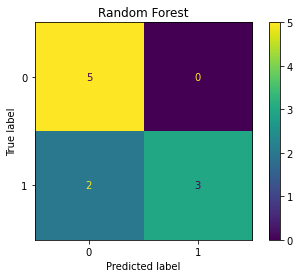

In [63]:
ConfusionMatrixDisplay.from_predictions(data_inf['DEATH_EVENT'], grid_rfc.best_estimator_.predict(data_inf_))
plt.title('Random Forest')
plt.show()

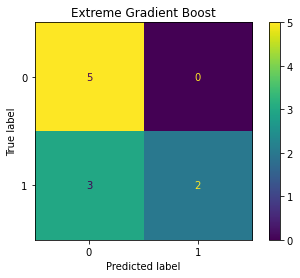

In [64]:
ConfusionMatrixDisplay.from_predictions(data_inf['DEATH_EVENT'], grid_xgb.best_estimator_.predict(data_inf_))
plt.title('Extreme Gradient Boost')
plt.show()

Pada Inference set kedua mode kita mendapatkan hasil score yang cukup bagus pada precision maupun recall. Model RFC mendapatkan score precision pada label 0 sebesar 0.71 dan pada label 1 mendapatkan score 1.0, sedangkan pada recall label 0 mendaptkan score 1.0 dan pada label 1 mendapatkan score 0.60. Model XGB menghasilkan score precision label 0 sebesar 0.62 dan label 1 sebesar 1.0, sedangkan pada recall label 0 mendapatkan score 1.0 dan recall label 1 mendapatkan score 0.40.

# Kesimpulan

Dataset kali ini berisikan data-data pasien yang mengalami gagal jantung dengan target klasifikasi apakah pasien meninggal atau tidak. Dataset ini berisi seperti jenis kelamin pasien, merokok atau tidak, diabetes atau tidak, memiliki anemia atau tidak, memiliki hipertensi atau tidak, dan lain sebagainya. Pasien yang mengalami gagal jantung ini kebanyakan adalah pria. Usia rata-rata pasien dalam data ini adalah 65 tahun dimana usia terkceil adalah 40 tahun dan hal itu menunjukan gagal jantung menyerang orang tua. Kita juga bisa melihat bahwa kebanyakan pasien ternyata tidak memiliki diabetes ataupun darah tinggi. Persentase orang yang merokok juga lebih sedikit dibandingkan yang merokok.

Dari banyak kolom dalam data kita, dilakukanlah perhitungan korelasi antar kolom dan menunjukan kolom yang mempengaruhi seorang pasien meninggal atau tidak adalah kolom `age`, `ejection_fraction`,	`serum_creatinine`,	`serum_sodium`,	`time`. Saya juga menambahkan kolom menurut personal judgement saya dan juga informasi di internet bahwa `diabetes` dan `high_blood_pressure` juga mempengaruhi.

Model yang dipilih untuk mengatasi kasus ini adalah model Random Forest dan model Extreme Gradient Boosting. Kedua model itu dilakukan train menggunakan gridsearch untuk mencari hyperparameter terbaik untuk kedua model.

Kedua model menghasilkan hasil score yang sangat baik dalam menangani kasus ini, namun kedua model ini mengalami overfit meskipun berbeda gapnya. Secara keseluruhan model Random Forest menghasilkan nilai lebih tinggi dalam Train-Set sedangkan model XGB lebih bagus dalam Test-Set. Model Random Forest mengalami overfit dengan gap sekitar 10% antara Train dan Test sedangkan model XGB memiliki gap sekitar 6% antara Train dan Test. Dalam inference set, kedua model kita berhasil memperoleh nilai recall sebesar 1.0 pada label 0 namun hanya 0.6 untuk model RFC dan 0.4 untuk model XGB pada label 1, dimana sebenarnya kita lebih fokus pada recall label 1 dalam kasus ini.

Jadi menurut saya model yang lebih bagus adalah model XGB karena mendapatkan hasil Test yang lebih tinggi dibandingkan dengan Random Forest dan juga gap antara Train dan Testnya tidak terlalu jauh jika dibandingkan dengan Random Forest. Untuk peningkatannya saya rasa jika targetnya lebih balance maka hasil recall pada label 1 akan lebih baik terlebih kita berfokus pada label 1.

# Soal

## Soal 1

Apakah yang dimaksud dengan Bagging?

Bagging merupakan singkatan dari bootstrap dan aggregating, dimana terjadi proses pengacakan dan penduplikasian data (bootstrap) untuk menghasilkan set pelatihan L (learning), yang akan digunakan untuk melatih model yang sama sejumlah n, dan kemudian, selama pengujian, mengambil rata-rata nilai dari n model tersebut.

## Soal 2

Jelaskan perbedaan algoritma Random Forest dengan algoritma boosting yang Anda pilih?

Random Forest pada dasarnya merupakan salah satu algoritma bagging sedangkan XGB merupakan salah satu algoritma boosting. Letak perbedaanya adalah baggin melakukan training model secara pararel dan bersamaan dimana hasilnya dilakukan agregating sedangkan algoritma boosing melakukan train secara sequential dimana satu model akan menghasilkan output dulu baru disalurkan ke model selanjutnya untuk train dan seterusnya.